In [1]:
from experiment import PavlovTiming
from model import ValueRNN
from train import make_dataloader, train_model, probe_model
from plotting import plot_trials, plot_loss, plot_predictions, plot_hidden_activity

### Create Experiment

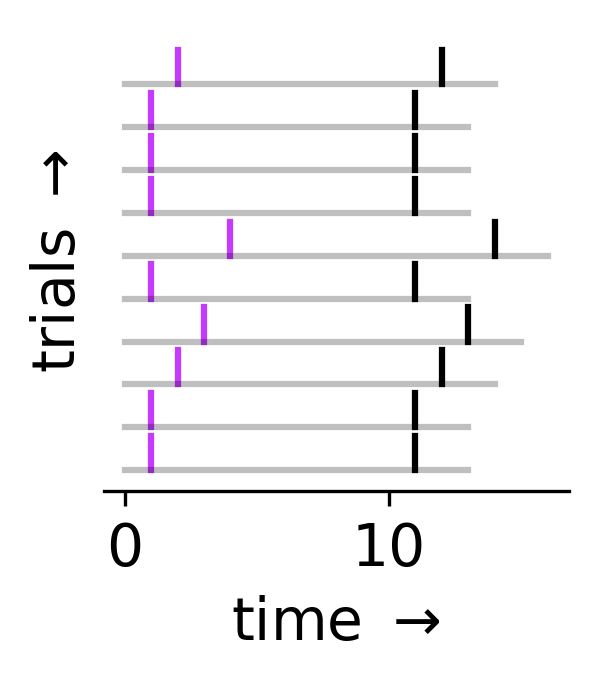

In [2]:
E = PavlovTiming(ncues=1)
plot_trials(E.trials[:10])

### Create Model

In [3]:
hidden_size = 2 # number of hidden neurons
gamma = 0.5     # discount rate
model = ValueRNN(input_size=E.ncues + int(E.include_reward),
                 output_size=7,
                 hidden_size=hidden_size, 
                 gamma=gamma)
print('model # parameters: {}'.format(model.n_parameters()))

model # parameters: 48


### Training Model

Epoch 0, 0.3332
Epoch 200, 0.3033
Epoch 400, 0.3029
Epoch 600, 0.3013
Epoch 800, 0.3013
Epoch 1000, 0.3013
Epoch 1200, 0.3013
Epoch 1400, 0.3011
Epoch 1600, 0.3005
Epoch 1800, 0.3004
Epoch 2000, 0.3003
Epoch 2200, 0.3002
Epoch 2400, 0.3002
Epoch 2600, 0.3002
Epoch 2800, 0.3002
Epoch 3000, 0.3002
Epoch 3200, 0.3002
Epoch 3400, 0.3002
Epoch 3600, 0.3002
Epoch 3800, 0.3002
Epoch 4000, 0.3002
Epoch 4200, 0.3002
Epoch 4400, 0.3002
Epoch 4600, 0.3002
Epoch 4800, 0.3002
Epoch 5000, 0.3002
Epoch 5200, 0.3002
Epoch 5400, 0.3002
Epoch 5600, 0.3002
Epoch 5800, 0.3001
Epoch 6000, 0.3002
Epoch 6200, 0.3001
Epoch 6400, 0.3001
Epoch 6600, 0.3001
Epoch 6800, 0.3001
Done! Best loss: 0.30012411400675776


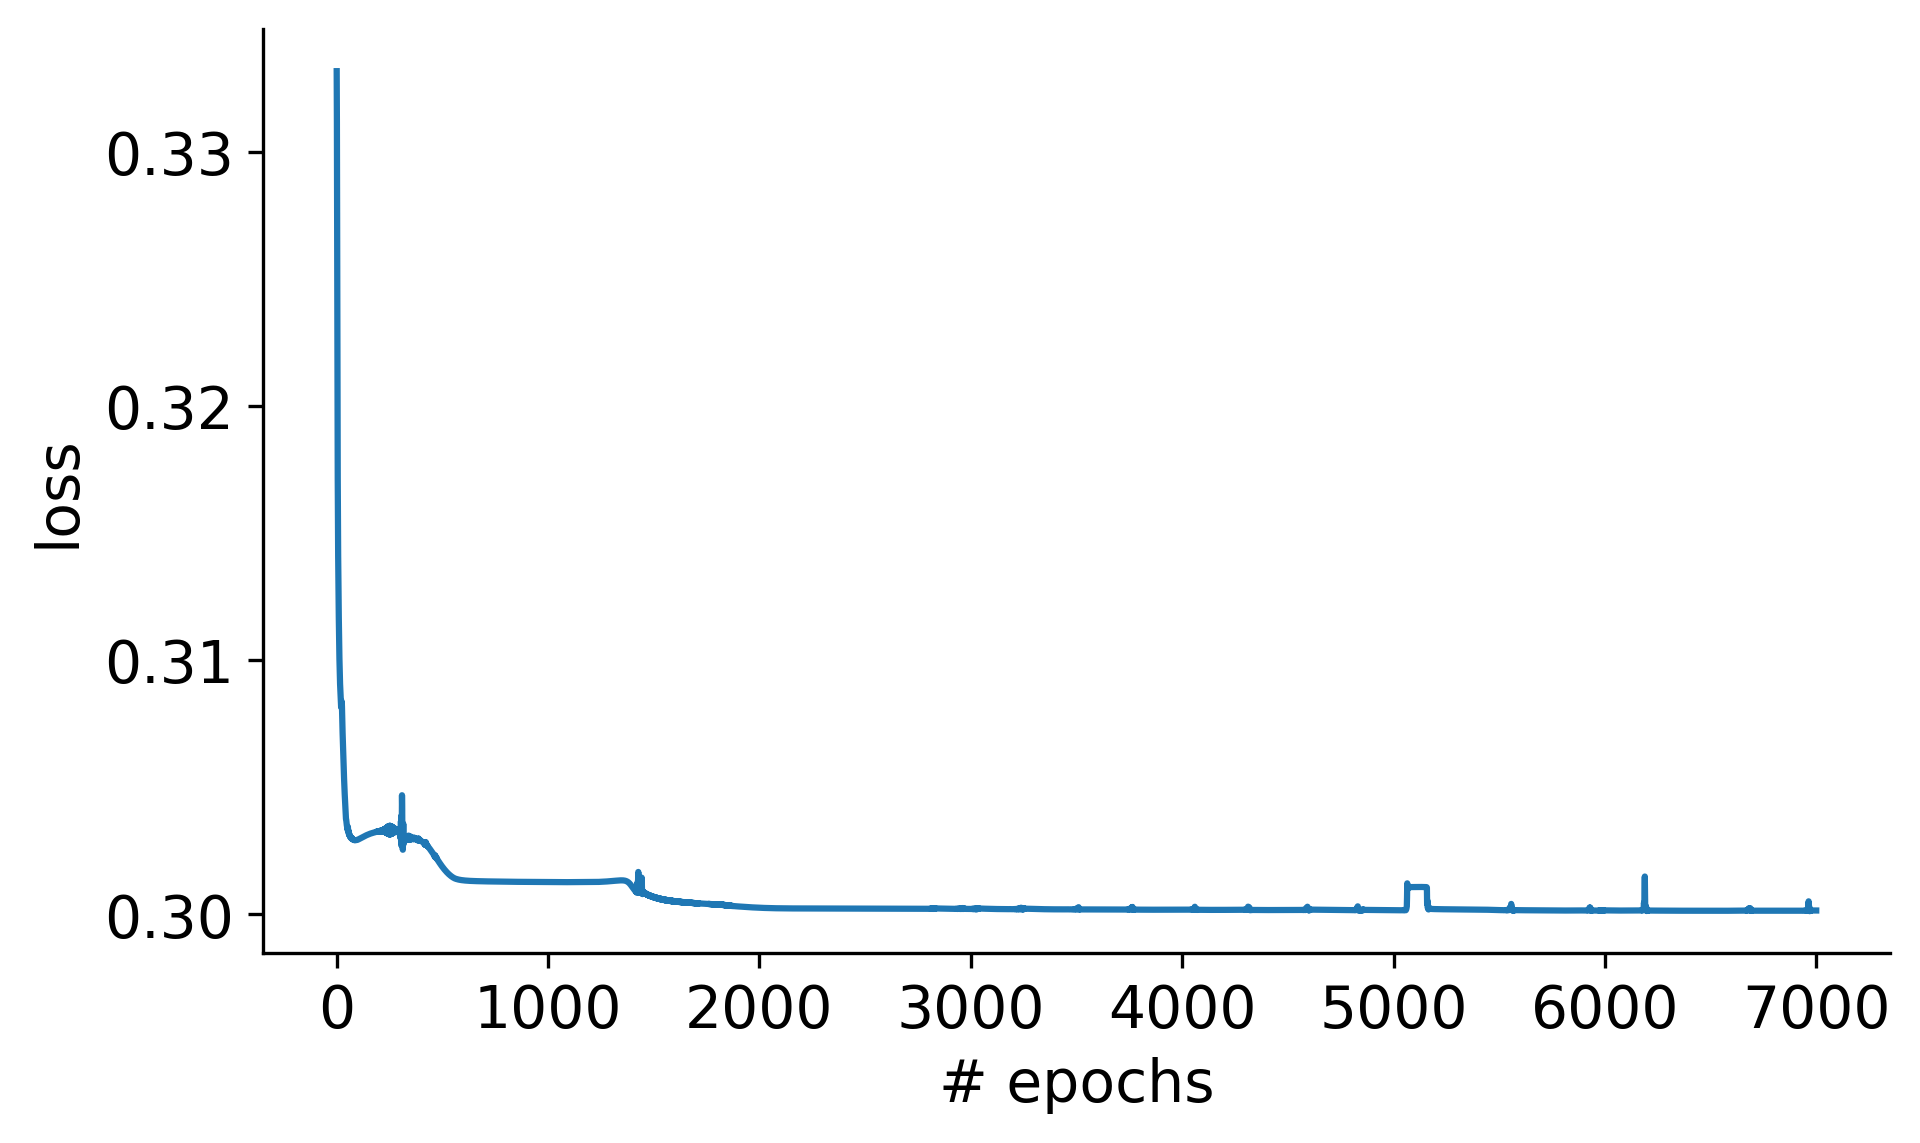

In [4]:
lr = 0.01
batch_size = 12
dataloader = make_dataloader(E, batch_size=batch_size)
scores = train_model(model, dataloader, lr=lr, epochs=7000, print_every=200)
plot_loss(scores)

### Plotting predicted and actual values

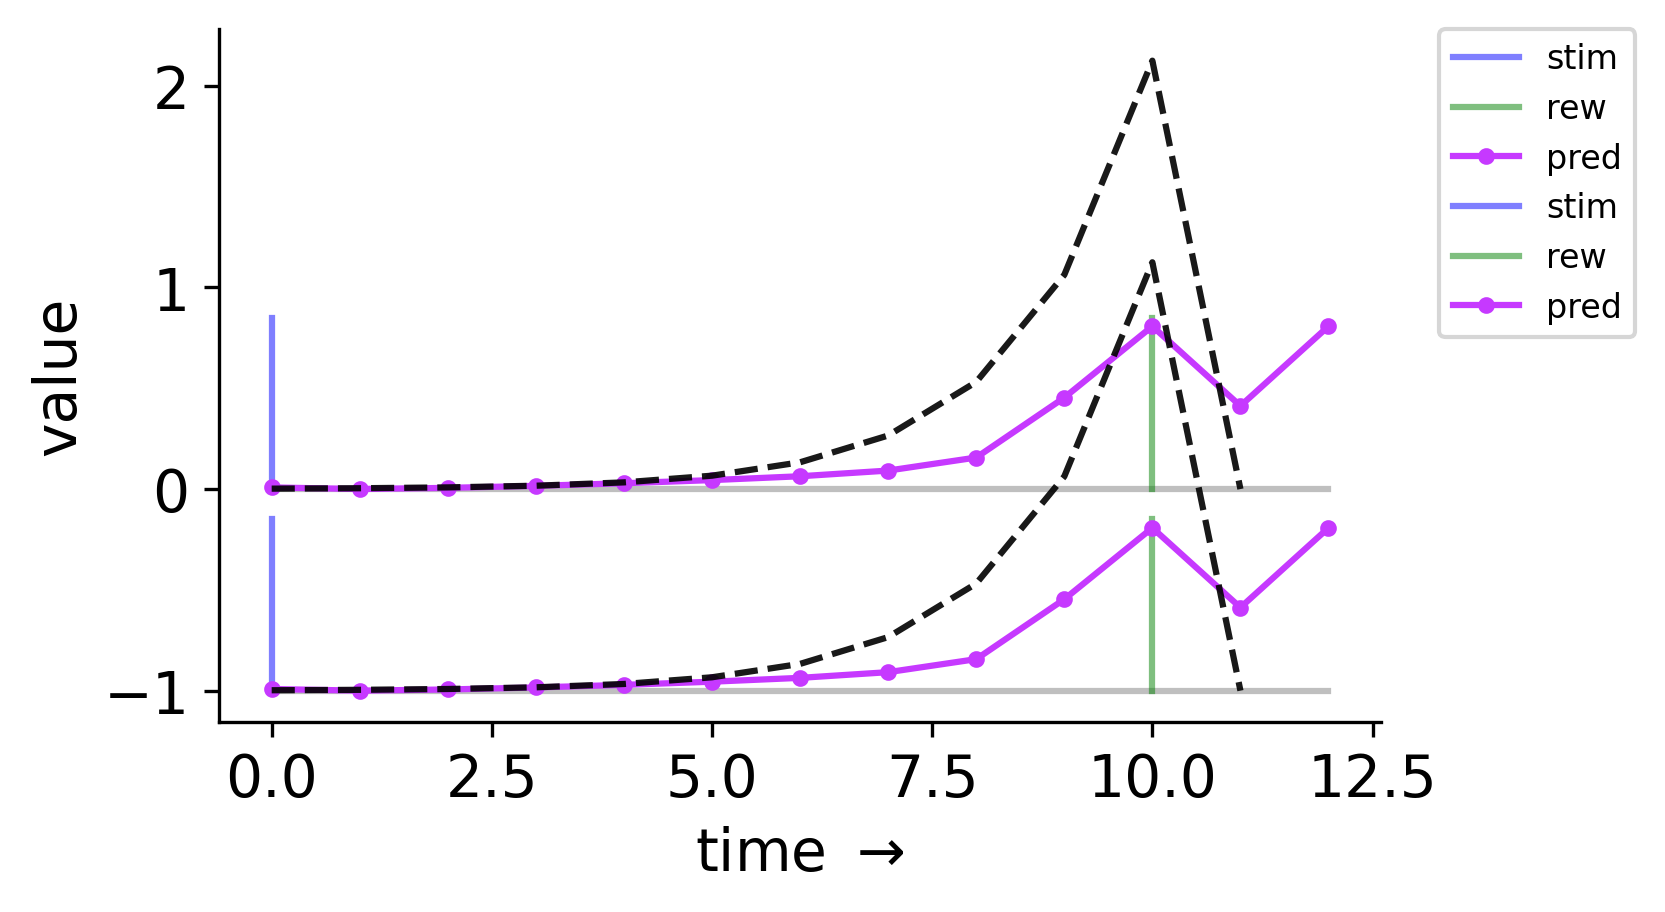

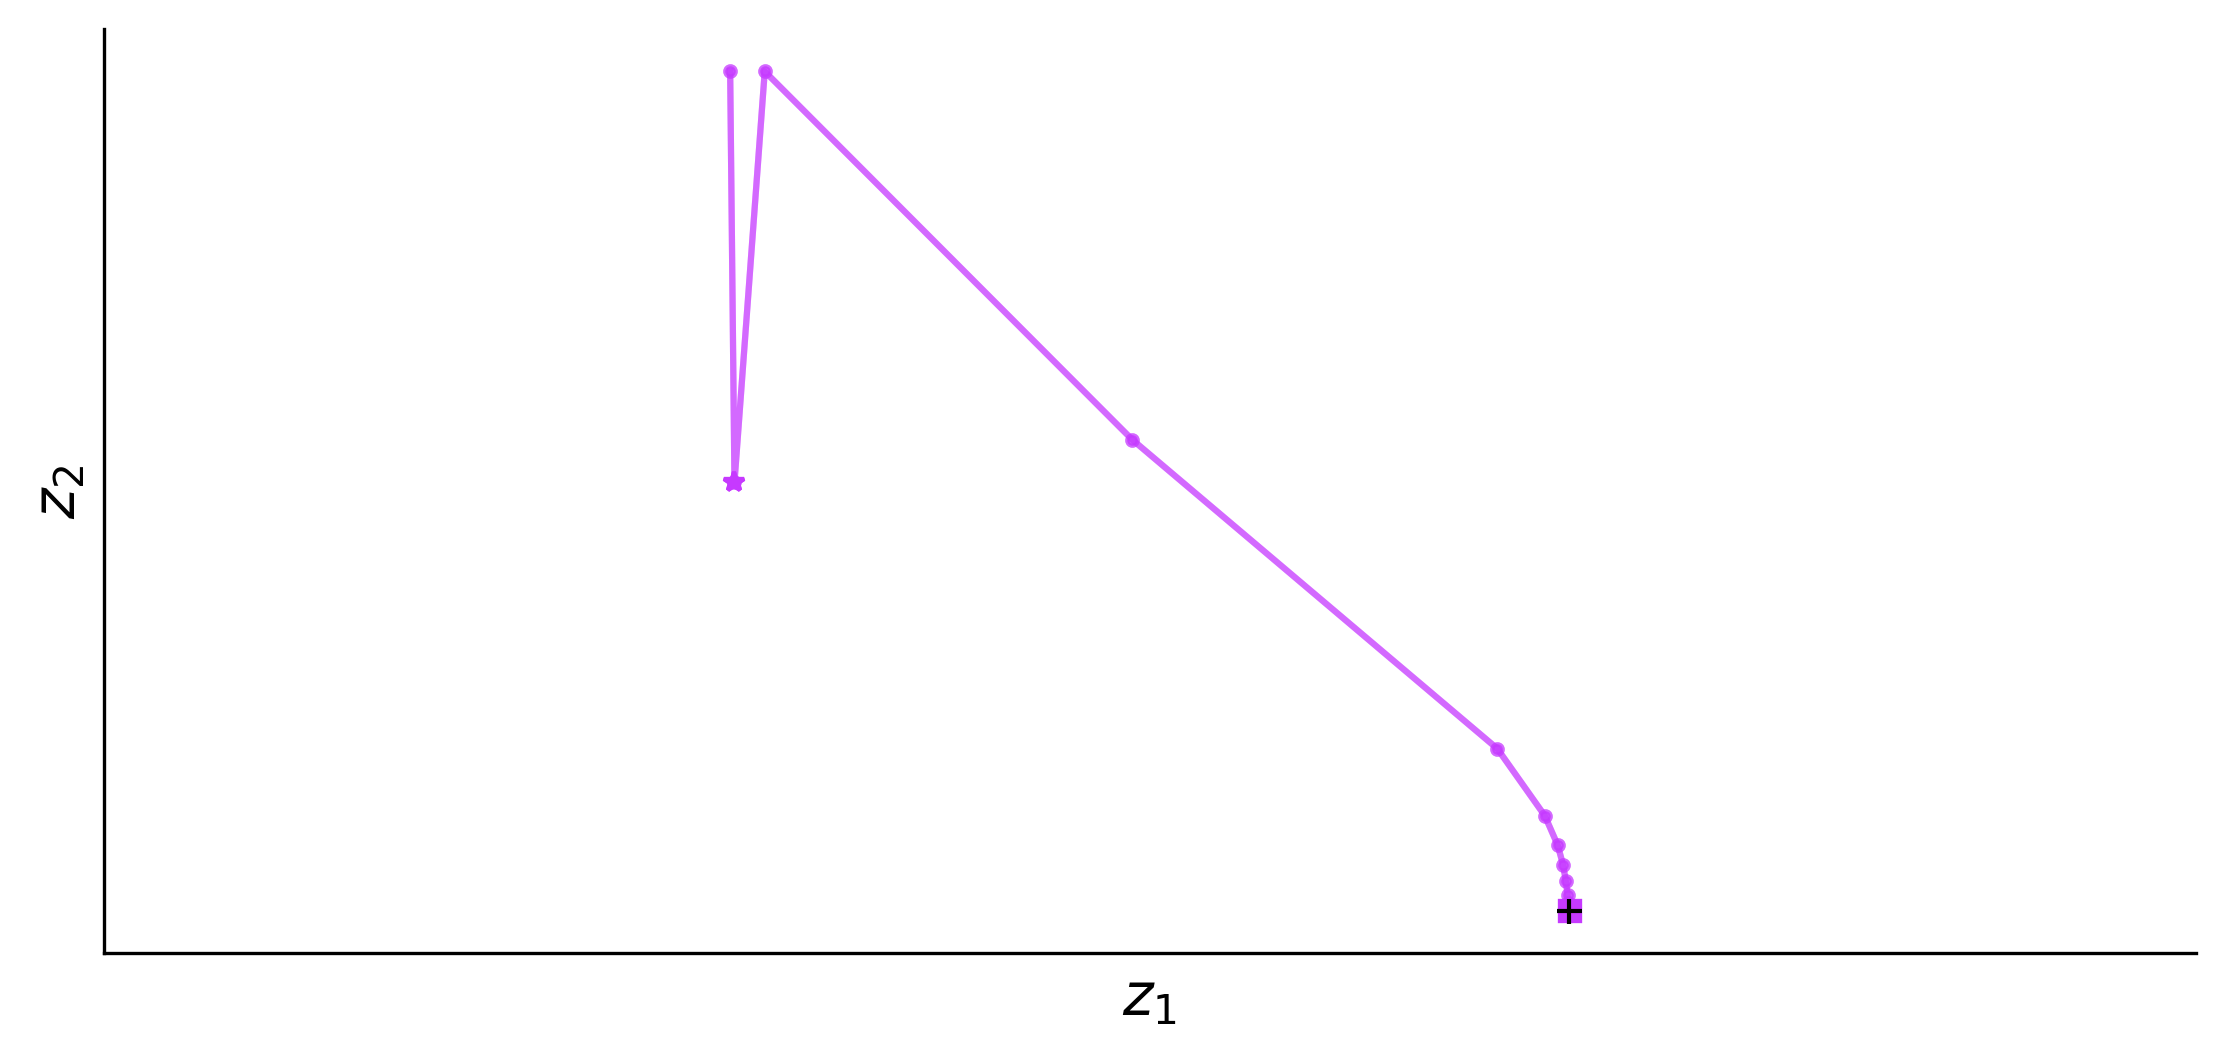

In [5]:
responses = probe_model(model, dataloader)
plot_predictions(responses[:2], 'value', gamma=model.gamma)
plot_hidden_activity(responses[:2])